# 07-11 Placing Street Light Outages to Street Light Clusters in DC

In [35]:
#import packages 
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde

In [34]:
#Read in datasets
Lights = pd.read_csv("Street_Lights.csv")
df_0 = pd.read_excel("inv_geoLights0.xlsx")
df_1 = pd.read_excel("inv_geolights1.xlsx")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (9,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
#Concat two geospatial datasets
l = [df_0, df_1]
df_new = pd.concat(l)

#Rename coordinate columns
df_new = df_new.rename(columns={"gpsX_left":"gpsX_light", "gpsY_left":"gpsY_light", "gpsX_right":"gpsX_crime", "gpsY_right":"gpsX_crime"})
df_new.head()

,index,WoID,WoEntered,WoCompleted,gpsX_light,gpsY_light,inventoryID,altinventoryIDchar,SLpepcolightID,SLlighttype,...,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,gpsX_crime,gpsX_crime,Tdelta
0,0,1067343,2011-09-29 20:56:52,2016-11-21 07:09:52,-76.988519,38.856961,4.0,-???-,??,High Pressure Sodium,...,Precinct 118,38.856883,-76.988237,NaN,2014-06-29T12:15:00.000Z,2014-06-29T20:05:00.000Z,166732712,-76.988239,38.856890,0
29,1,1076333,2012-01-19 23:10:12,2016-11-21 07:09:36,-76.993025,38.889819,4.0,-???-,??,High Pressure Sodium,...,Precinct 88,38.889800,-76.993211,NaN,2012-08-27T09:00:00.000Z,2012-08-27T18:30:00.000Z,166232512,-76.993213,38.889807,0
42,2,1085417,2012-05-20 01:25:40,2016-11-21 07:09:15,-76.942939,38.885127,4.0,-???-,??,High Pressure Sodium,...,Precinct 103,38.884885,-76.943040,NaN,2013-05-17T22:29:00.000Z,2013-05-17T22:29:00.000Z,165887271,-76.943042,38.884893,0
57,3,1090068,2012-07-16 08:56:06,2016-11-21 07:09:06,-76.939169,38.901913,4.0,-???-,??,High Pressure Sodium,...,Precinct 94,38.901491,-76.939185,NaN,2013-08-01T00:42:00.000Z,2013-08-01T00:42:00.000Z,166141803,-76.939187,38.901498,0
64,5,1113893,2013-07-05 11:11:36,2016-06-09 09:38:00,-77.072398,38.926423,4.0,-???-,??,High Pressure Sodium,...,Precinct 12,38.926180,-77.072608,NaN,2015-03-27T23:45:00.000Z,2015-03-28T21:00:00.000Z,166631663,-77.072610,38.926188,0


# Density Plot for Street Lights in DC
## Source: https://python-graph-gallery.com/85-density-plot-with-matplotlib/

In [39]:
%matplotlib notebook

<IPython.core.display.Javascript object>


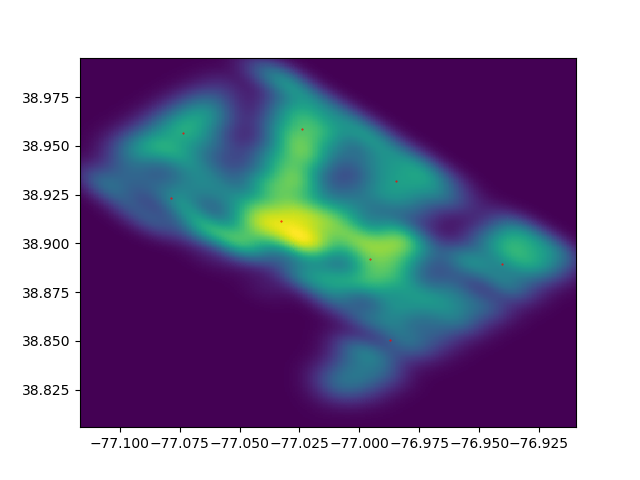

In [40]:
#Subset street light dataset
sub_lights = Lights[["X","Y"]]

#Create data
x = sub_lights["X"]
y = sub_lights["Y"]

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.scatter(clusters[:,0], clusters[:,1], s=0.2, c="red")
plt.show()
 

# K-Means Cluster Analysis

In [41]:
#Fit around street light dataset
kmeans = KMeans(n_clusters=8, random_state=0).fit(sub_lights)
kmeans.cluster_centers_

array([[-77.02394619,  38.95875507],
       [-76.99565033,  38.89176609],
       [-76.94028054,  38.88923988],
       [-77.0784525 ,  38.92318764],
       [-77.03267919,  38.91148876],
       [-76.98736594,  38.85059017],
       [-76.98483198,  38.93199823],
       [-77.07366251,  38.95658339]])

In [42]:
#place each steet light from df_new to a street light cluster
clusters = kmeans.cluster_centers_
df_new["light_clusters"] = kmeans.predict(df_new.iloc[:,4:6])

In [43]:
#export df_new to an excel spreadsheet
writer = pd.ExcelWriter('lc_inv_geoLights.xlsx')
df_new.to_excel(writer,'Sheet1')
writer.save()